In [64]:
!pip install plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('jobs_in_data.csv')

In [4]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# Basic Exploration

## distribution of data across years

2020      71
2021     197
2022    1634
2023    7453
Name: work_year, dtype: int64


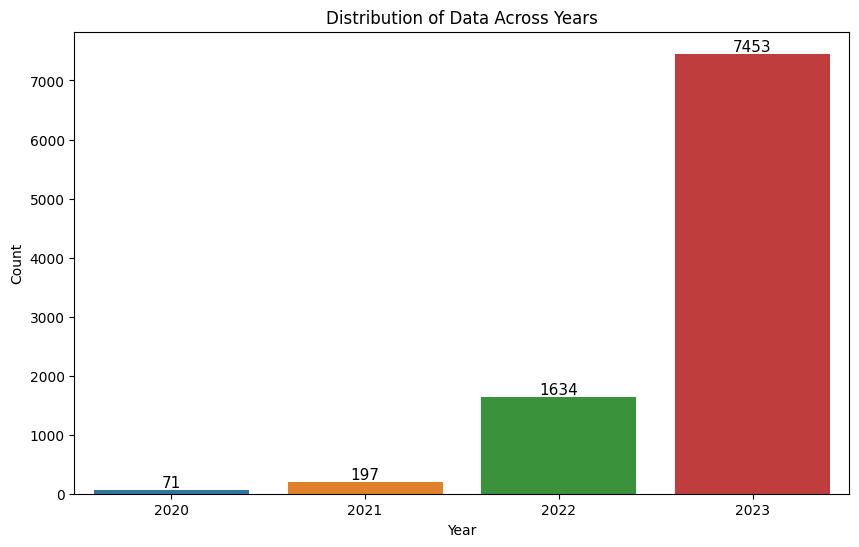

In [5]:
year_counts = df['work_year'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='work_year', data=df)
plt.title('Distribution of Data Across Years')
plt.xlabel('Year')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Increasing Trend:
### 1) The dataset shows a clear increasing trend in the number of data-related job postings over the years.
### 2) The number of job postings has grown significantly, with a substantial increase from 2022 to 2023.

### Significant Growth in 2023:
### 1) The year 2023 stands out with a much higher number of job postings compared to previous years.
### 2) This could indicate a surge in demand for data-related roles in that particular year.

### Potential Industry Expansion:
### 1) The growth in job postings suggests a potential expansion or increased focus on data-related roles in the job market.
### 2) Industries might be recognizing the importance of data-related skills, leading to more job opportunities.


# salary exploration

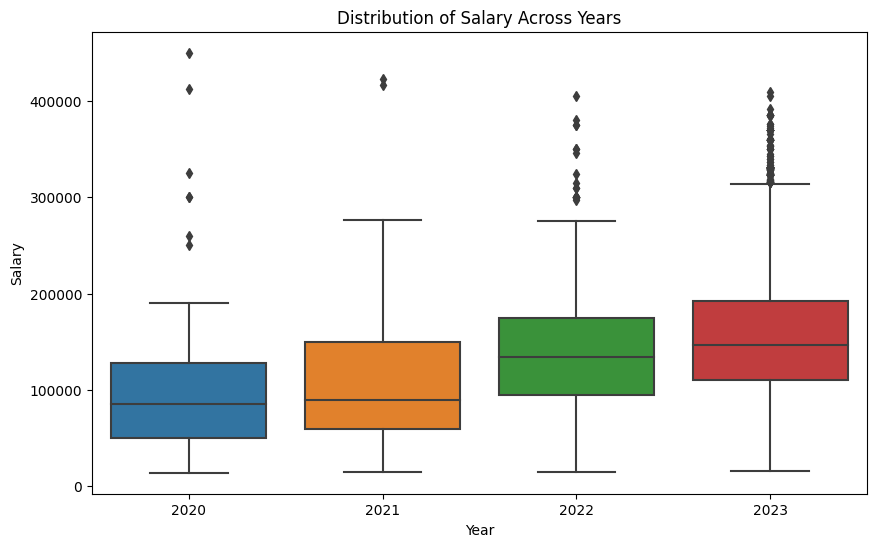

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', y='salary', data=df)
plt.title('Distribution of Salary Across Years')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

### The median salary appears to increase each year from 2020 to 2023 which is a good sign for job seekers because from the previous plot and this, it is clear over the years both job openings and their slaries have been increasing over the years.

### The spread of salaries (indicated by the size of the boxes) is largest in 2021 and smallest in 2022, meaning there was more variability in salaries in 2021 and less in 2022.

### There are several outliers each year, with a significant increase in outliers in 2023. These are individual data points that fall far outside the other salary values for those years 1.

## Average salary for each year

work_year
2020    105878.859155
2021    106483.644670
2022    135467.501836
2023    155132.591708
Name: salary_in_usd, dtype: float64


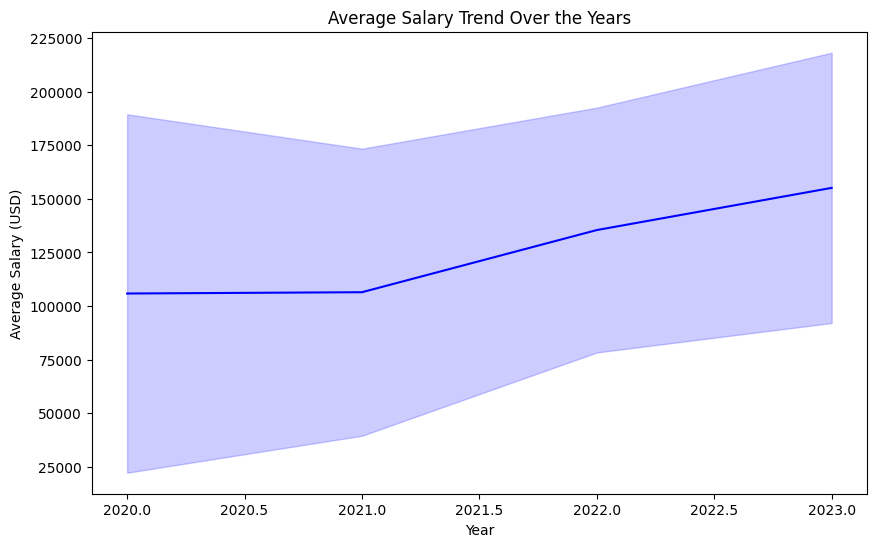

In [7]:
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
print(average_salary_by_year)

plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, errorbar='sd', color='blue')
plt.title('Average Salary Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()

# Job Title analysis

## frequency of each job title

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64


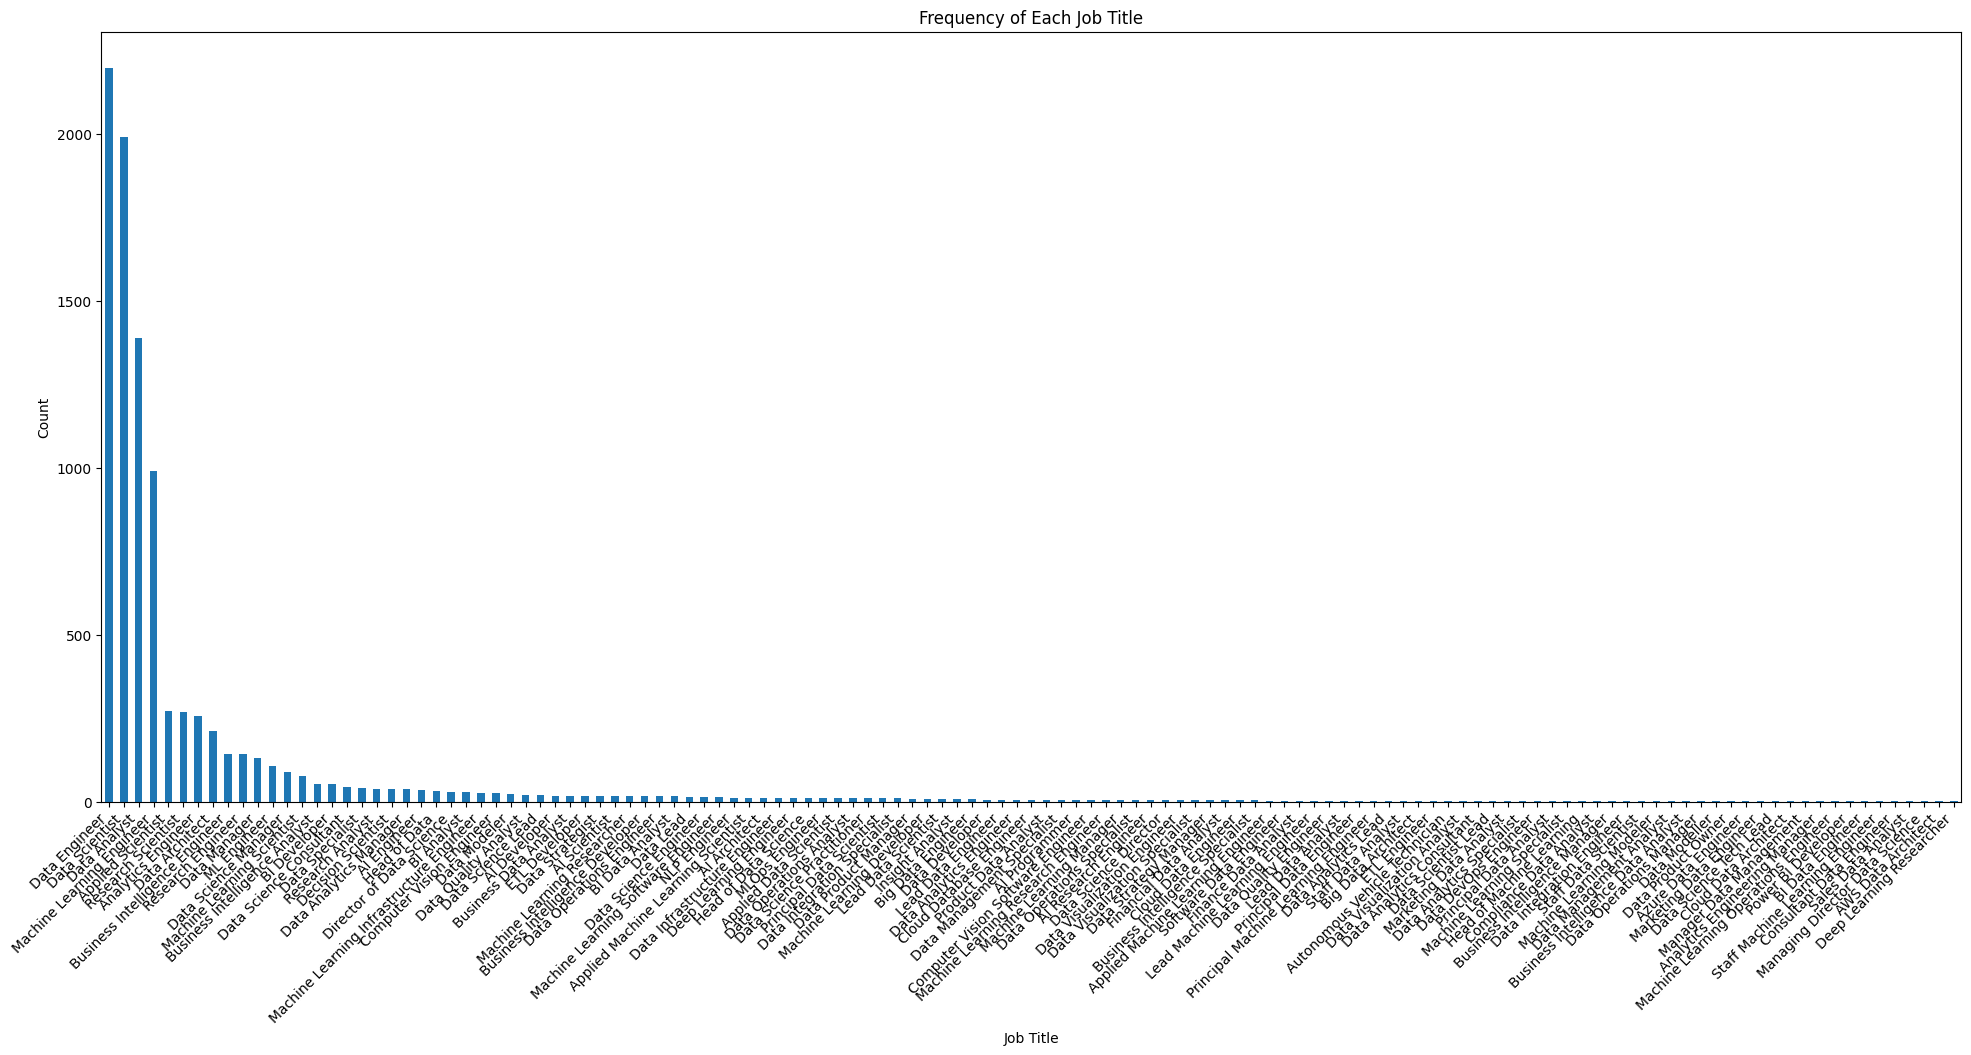

In [8]:
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)

plt.figure(figsize=(24, 10))
ax = job_title_counts.plot(kind='bar')
plt.title('Frequency of Each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

## top 10 most common data-related job titles

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
Research Scientist                 269
Analytics Engineer                 256
Data Architect                     213
Business Intelligence Engineer     144
Research Engineer                  144
Name: job_title, dtype: int64


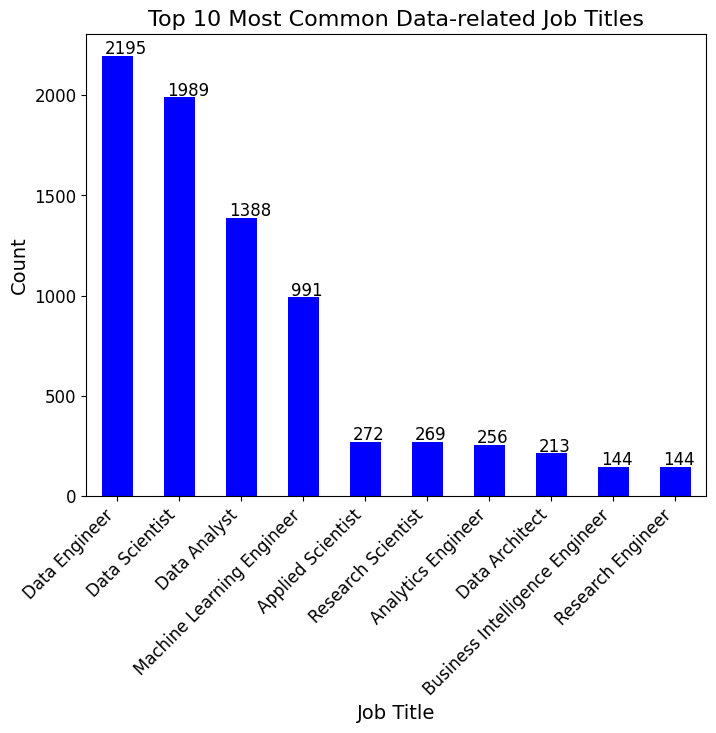

In [9]:
top_10_job_titles = job_title_counts.head(10)
print(top_10_job_titles)

plt.figure(figsize=(8, 6))
top_10_job_titles.plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Data-related Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(top_10_job_titles):
    plt.text(i - 0.2, v + 10, str(v), fontsize=12)

plt.show()


### Most Common Job Titles:
#### * The top three most common job titles are "Data Engineer," "Data Scientist," and "Data Analyst."
#### * These roles dominate the dataset, indicating a high demand for professionals in these positions.

### Diversity in Job Titles:
#### * The dataset includes a diverse range of job titles, with a total of 125 unique titles.
#### * This diversity suggests a specialization in different aspects of data-related roles, reflecting the varied nature of the field.

### Prominence of Specialized Roles:
#### * Specialized roles like "Machine Learning Engineer" and "Applied Scientist" have a significant presence, highlighting the importance of expertise in specific domains.

### Opportunities for Niche Roles:
#### * Niche roles, such as "AWS Data Architect" and "Deep Learning Researcher," are also represented, suggesting opportunities for professionals with specialized skills.

### Consideration for Recruiters:
#### * Recruiters can use this information to tailor their searches based on the most common job titles, ensuring they capture the majority of relevant profiles.

### Understanding Market Demand:
#### * Job seekers can gain insights into the titles that are currently in demand, helping them align their skills and experiences with market needs.

### Strategic Workforce Planning:
#### * Companies and organizations can use this information for strategic workforce planning, ensuring they have the right mix of skills based on the prevalence of different job titles.

# Salary Analysis

## average salaries by job titles

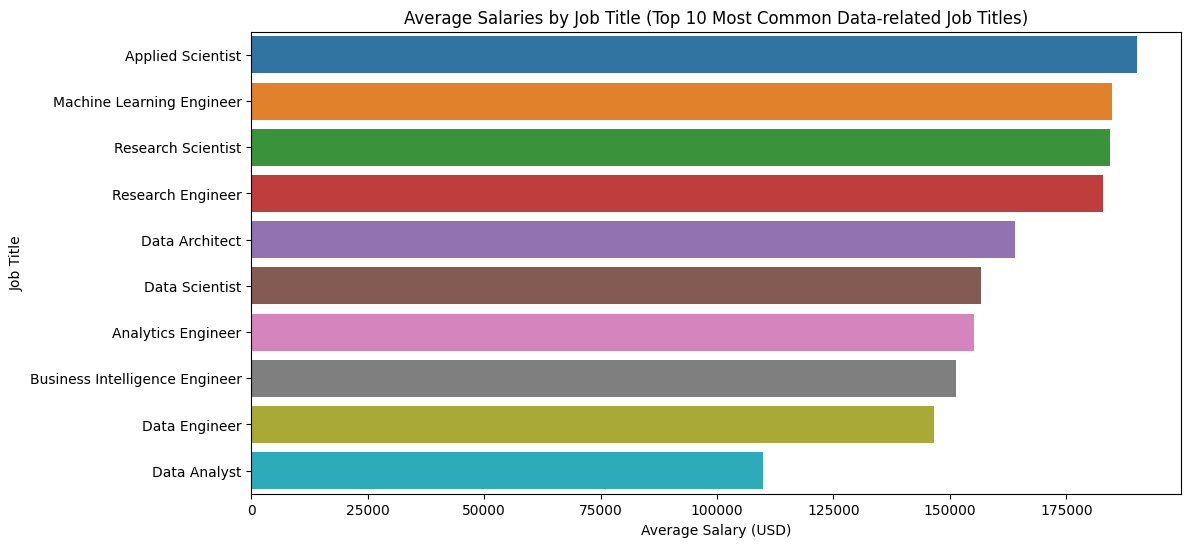

In [10]:
top_10_job_titles = df['job_title'].value_counts().head(10).index.tolist()

# Filter the df to only include the top 10 job titles
df_top_10 = df[df['job_title'].isin(top_10_job_titles)]

# Calculating the average salary for each job title
avg_salary_by_job_title = df_top_10.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Sorting the dataframe by average salary in descending order
avg_salary_by_job_title = avg_salary_by_job_title.sort_values('salary_in_usd', ascending=False)

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='job_title', data=avg_salary_by_job_title, errorbar=None, order=avg_salary_by_job_title['job_title'])
plt.title('Average Salaries by Job Title (Top 10 Most Common Data-related Job Titles)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

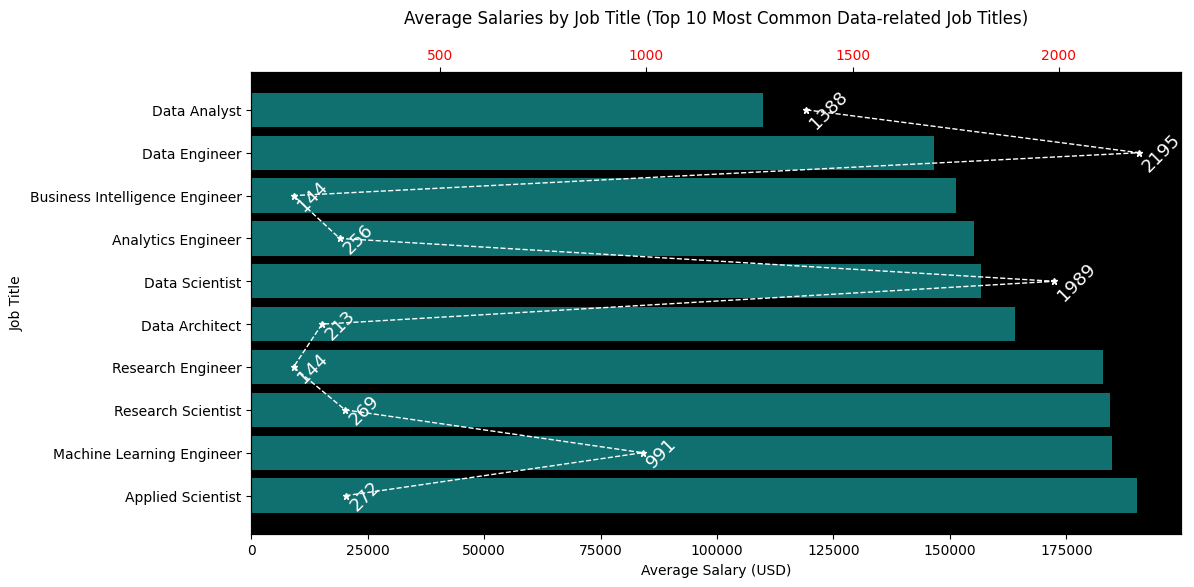

In [11]:
avg_salary_and_count_by_job_title = df_top_10.groupby('job_title')['salary_in_usd'].agg(['mean', 'count']).reset_index()
avg_salary_and_count_by_job_title.columns = ['job_title', 'average_salary', 'count']

avg_salary_and_count_by_job_title = avg_salary_and_count_by_job_title.sort_values('average_salary', ascending=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='average_salary', y='job_title', data=avg_salary_and_count_by_job_title, color='teal', order=avg_salary_and_count_by_job_title['job_title'])
plt.title('Average Salaries by Job Title (Top 10 Most Common Data-related Job Titles)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')

ax.set_facecolor('black')

ax2 = ax.twiny()
ax2.plot(avg_salary_and_count_by_job_title['count'], avg_salary_and_count_by_job_title['job_title'], color='white', marker='*', linestyle='--', linewidth=1, markersize=5)
ax2.set_xlabel('Count', color='white')
ax2.tick_params(axis='x', labelcolor='red')


gap = 0.5 
for i, v in enumerate(avg_salary_and_count_by_job_title['count']):
    ax2.text(v + gap, i, str(v), color='white', fontsize=13, va='center', rotation=45)

plt.show()

### The above plots shows that “Applied Scientist”, "ML Engineer" & "Research Scientist" has the highest average salary among the top 10 most common data-related job titles, while “Data Analyst” has the lowest.

### The plot highlights the importance of specialization in data-related roles, with specialized roles like “Applied Scientist” and “Machine Learning Engineer” having higher average salaries than more general roles like “Data Analyst”, "Data Engineer".

### The plot can be used by job seekers to understand that having skills related to data specialized roles can bring them higher salaries when compared to other common titles such as "data analyst" or "data engineer".

# Job category exploration

##  distribution of job categories

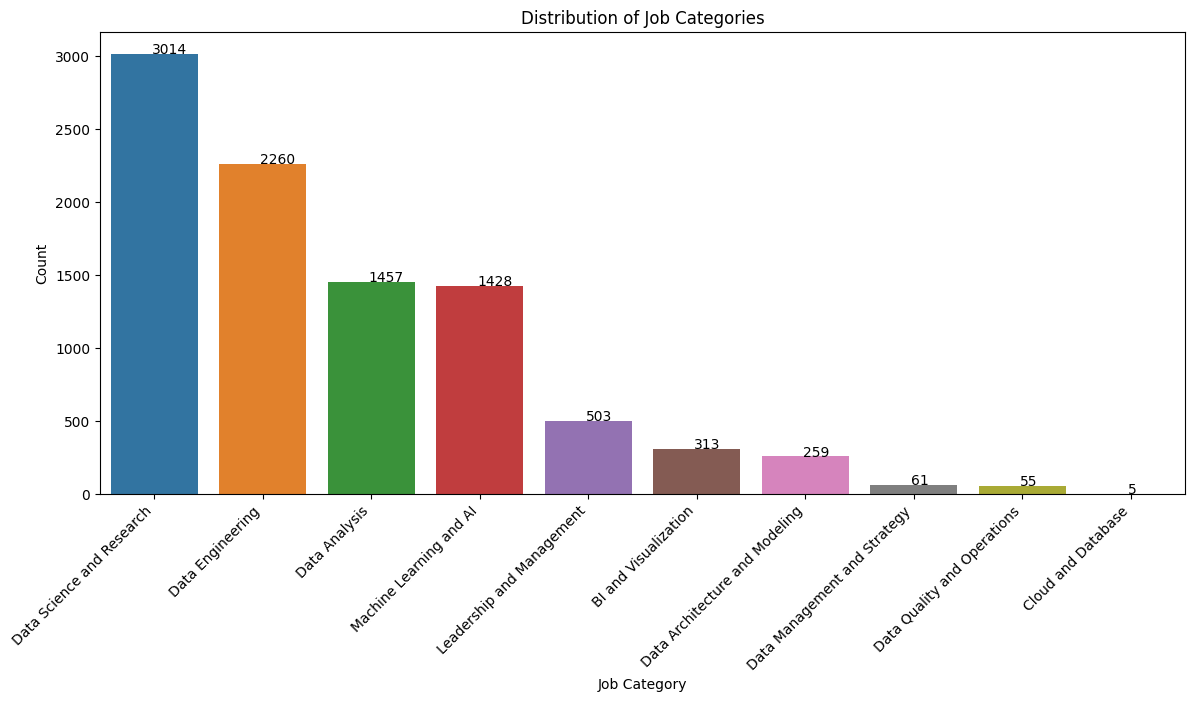

In [12]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='job_category', data=df, order=df['job_category'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for p, label in zip(ax.patches, df['job_category'].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.show()


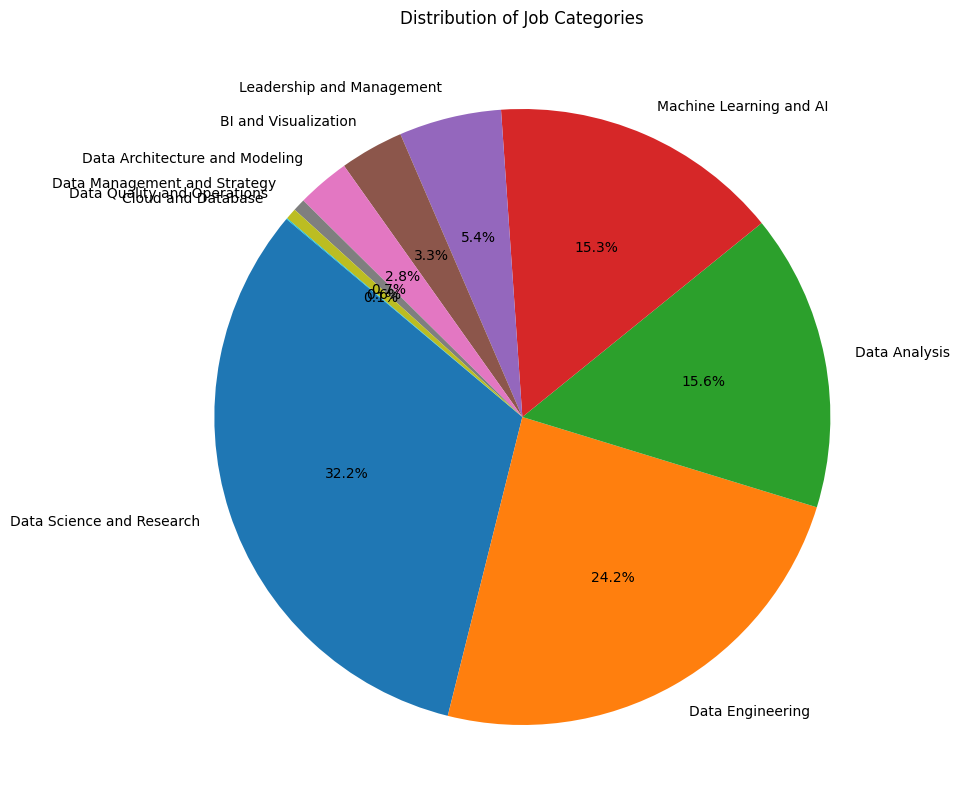

In [13]:
plt.figure(figsize=(14, 10))

job_category_counts = df['job_category'].value_counts()
labels = job_category_counts.index
sizes = job_category_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Categories')
plt.show()

### From the bar and pie charts above "Data Science & Research", "Data Engineering" are top most common category or peoples favorites followied by "Data Analysis" & "ML & AI".

### While "Data Quality & Operations", "Cloud & Databases" are the least choosen ones or with lessers jobs.

## the average salaries based on job categories

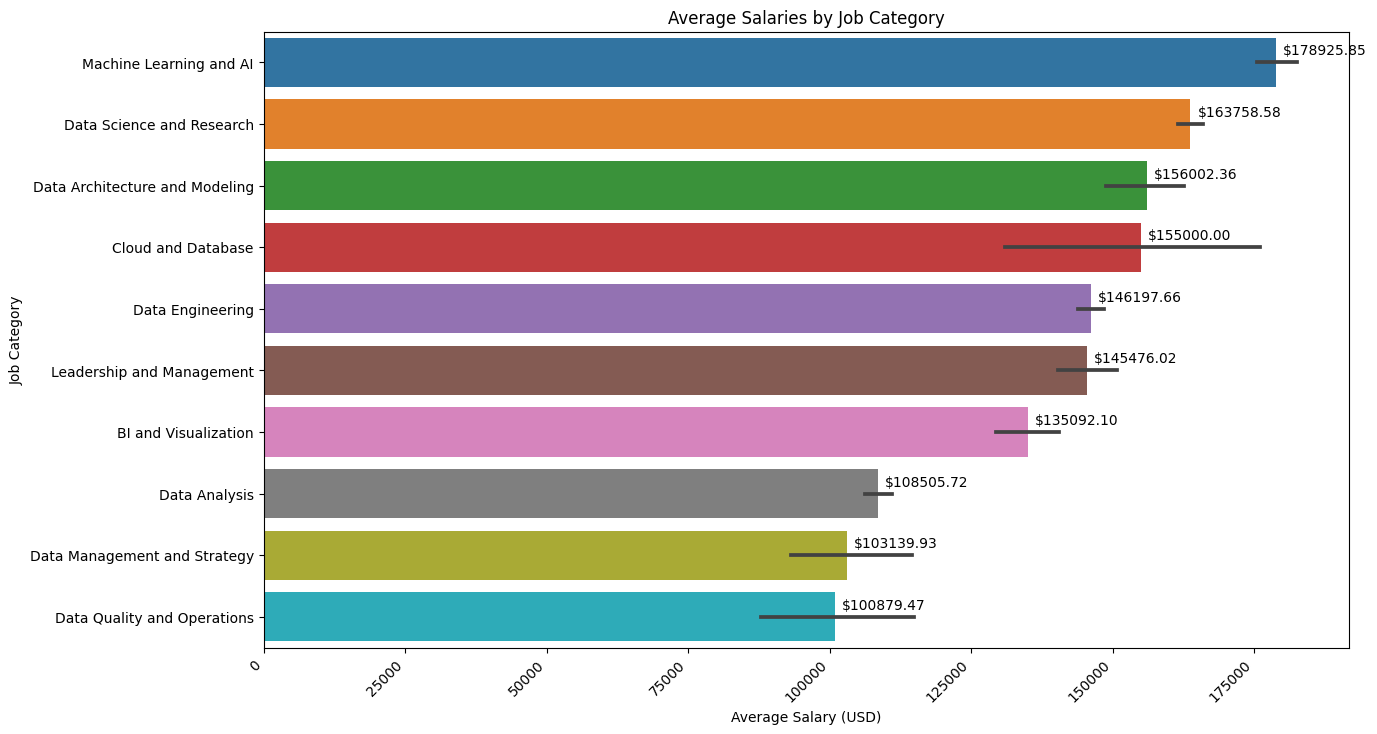

In [14]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='salary_in_usd', y='job_category', data=df, order=df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False).index)
plt.title('Average Salaries by Job Category')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Category')
plt.xticks(rotation=45, ha='right')
for p, label in zip(ax.patches, df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)):
    ax.annotate(f'${label:.2f}', (p.get_x()+p.get_width(), p.get_y()+0.5), xytext=(5, 10), textcoords='offset points')
plt.show()


### But after having a look at the avg salary comparision between these categories a few interesting things can be noticed, and they are:

#### 1) "ML & AI", "Data Science & Research" are not only most common category but also most paid job category

#### 2) "Leadership & Management", "BI & Visualization" are always the midlle ground categories, the demand and supply is always balanced with respectable avg salaries.

#### 3) Interestingly "Cloud & Database" have higher avg salary values when compared to other top common job categories even it is the least popular job category, leaving an inpression that there are chances for higher compansation can be achieved even in non popular roles, in other words popular jobs cannot garuntee higher salaries

# Currency Conversion

## average salary in USD based on different currencies

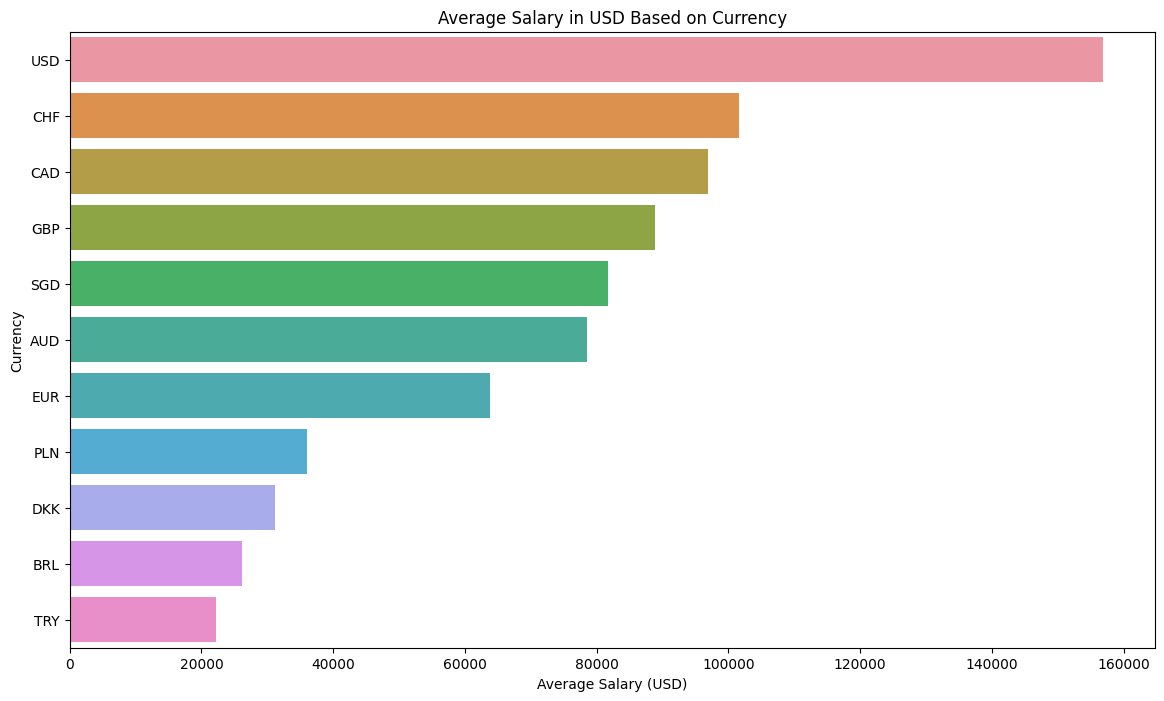

In [15]:
plt.figure(figsize=(14, 8))
sns.barplot(x='salary_in_usd', y='salary_currency', data=df, errorbar=None, order=df.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False).index)
plt.title('Average Salary in USD Based on Currency')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Currency')
plt.show()

# Geographical Analysis

## the average salary based on employee residence and company location

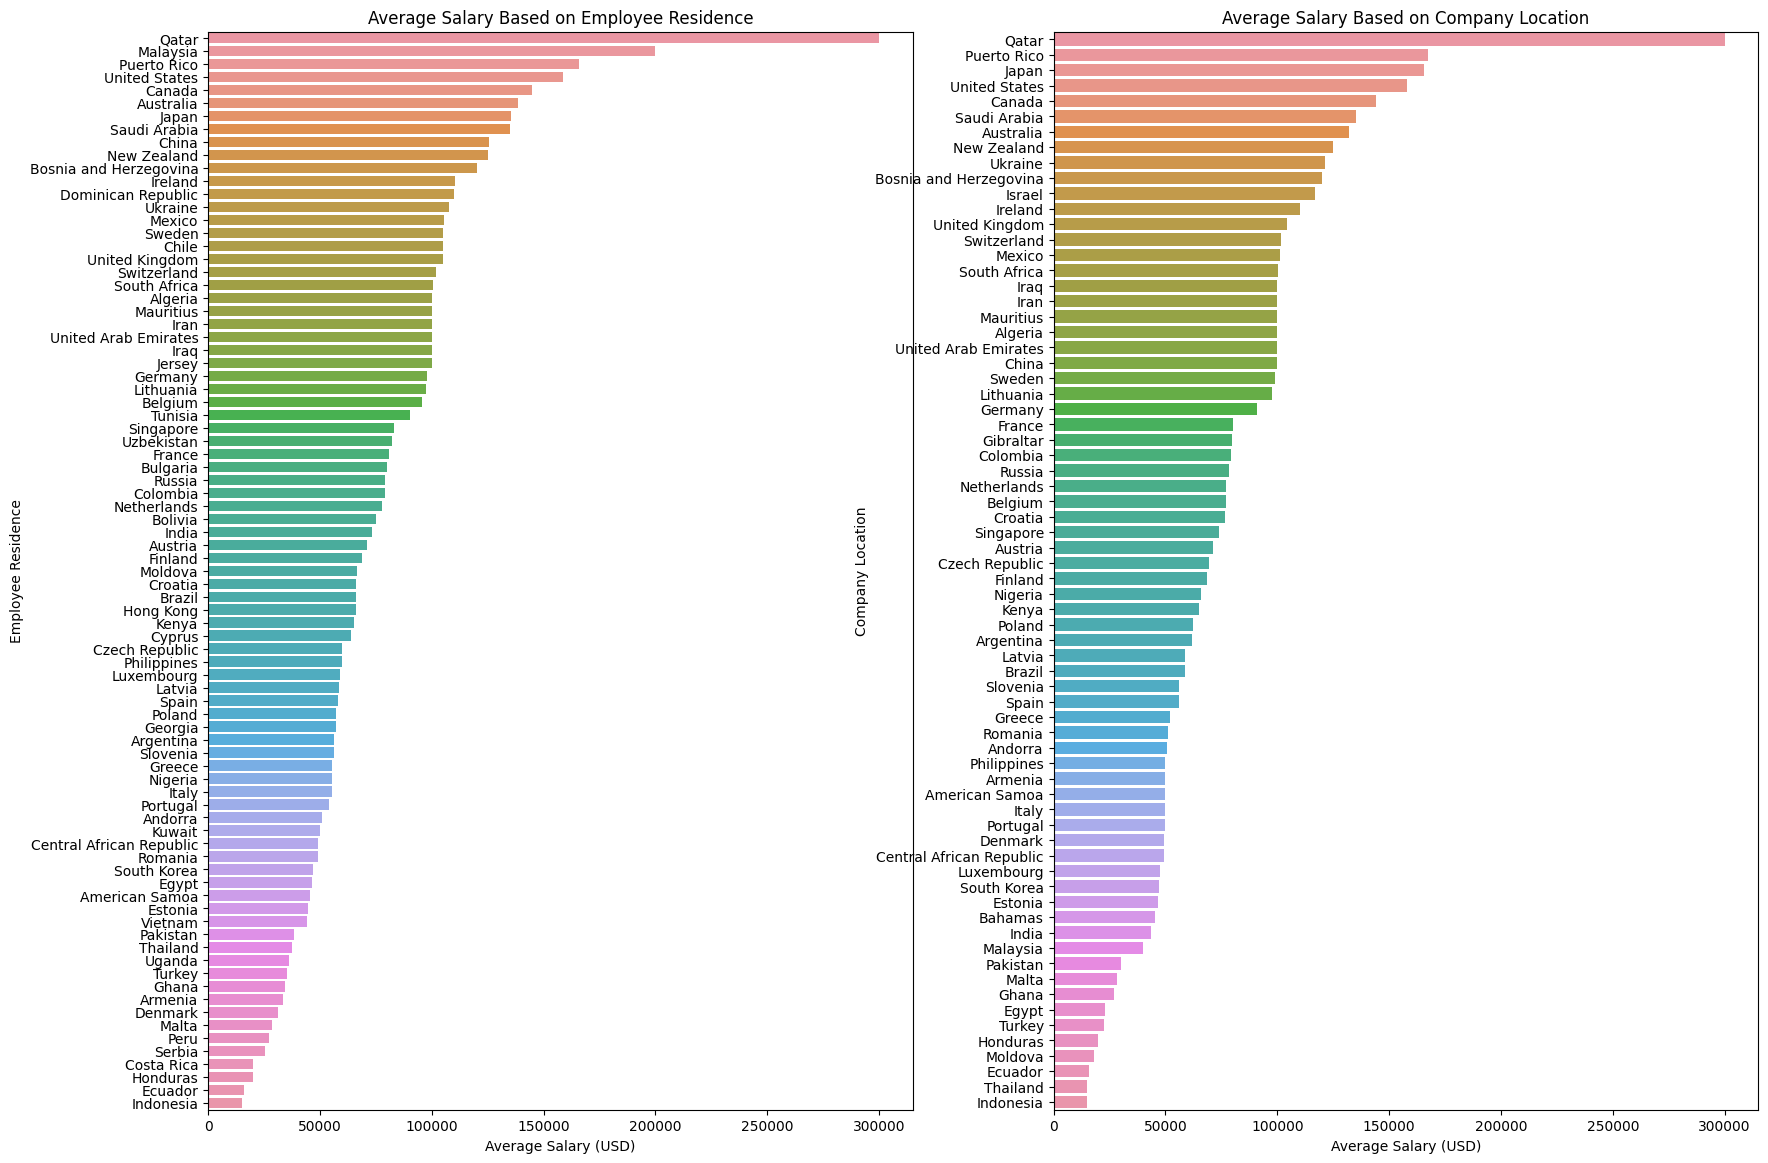

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 14))
sns.barplot(x='salary_in_usd', y='employee_residence', data=df, errorbar=None, order=df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).index, ax=axs[0])
axs[0].set_title('Average Salary Based on Employee Residence')
axs[0].set_xlabel('Average Salary (USD)')
axs[0].set_ylabel('Employee Residence')

sns.barplot(x='salary_in_usd', y='company_location', data=df, errorbar=None, order=df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index, ax=axs[1])
axs[1].set_title('Average Salary Based on Company Location')
axs[1].set_xlabel('Average Salary (USD)')
axs[1].set_ylabel('Company Location')

plt.show()

### As one can observe order of countires are mostly same in both the graphs suggesting that employees prefer to reside at the company location.

# Experience Level Impact

## the impact of experience levels on salaries

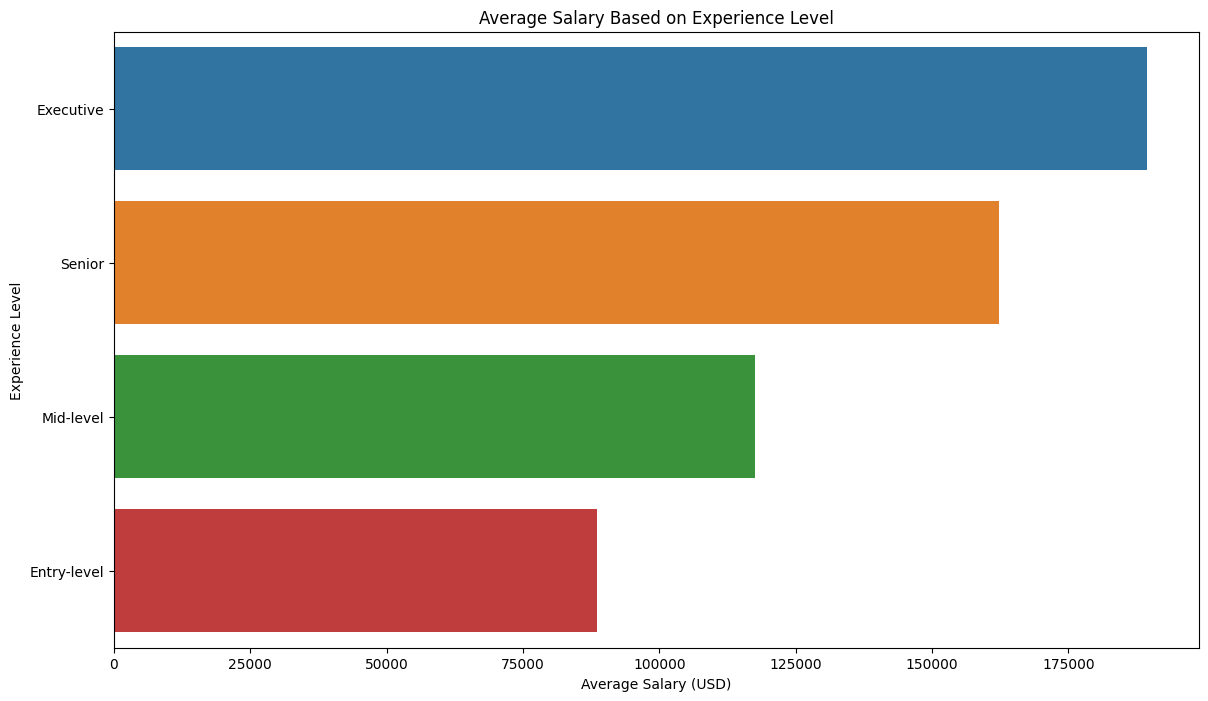

In [17]:
plt.figure(figsize=(14, 8))
sns.barplot(x='salary_in_usd', y='experience_level', data=df, errorbar=None, order=df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).index)
plt.title('Average Salary Based on Experience Level')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Experience Level')
plt.show()

## Employment Type, Work Setting, and Company Size

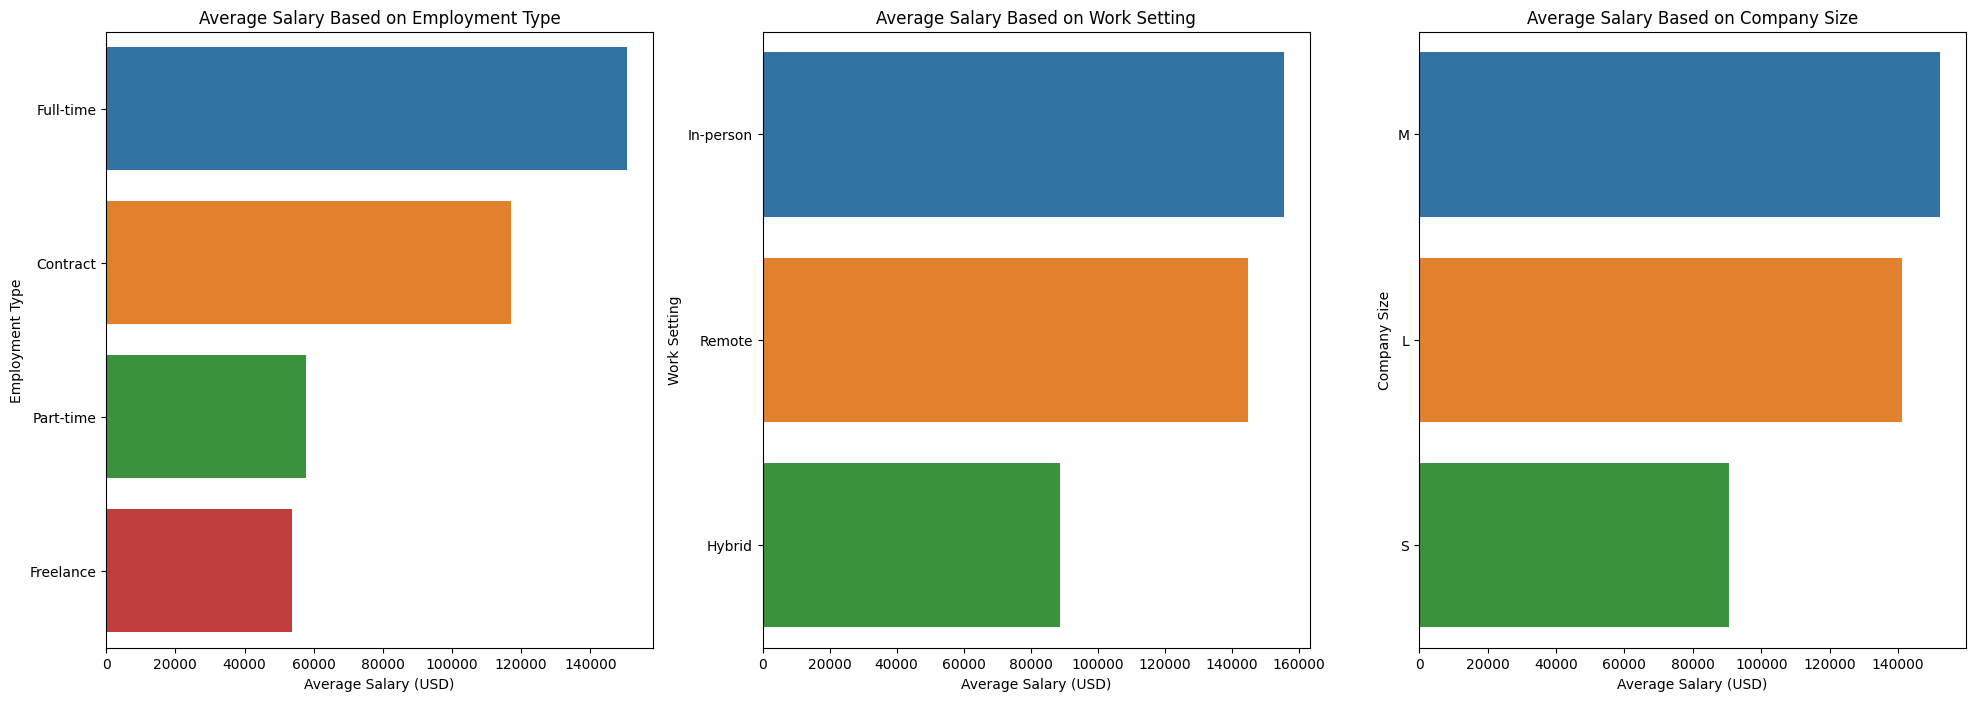

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(24, 8))

sns.barplot(x='salary_in_usd', y='employment_type', data=df, errorbar=None, order=df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).index, ax=axs[0])
axs[0].set_title('Average Salary Based on Employment Type')
axs[0].set_xlabel('Average Salary (USD)')
axs[0].set_ylabel('Employment Type')

sns.barplot(x='salary_in_usd', y='work_setting', data=df, errorbar=None, order=df.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False).index, ax=axs[1])
axs[1].set_title('Average Salary Based on Work Setting')
axs[1].set_xlabel('Average Salary (USD)')
axs[1].set_ylabel('Work Setting')

sns.barplot(x='salary_in_usd', y='company_size', data=df, errorbar=None, order=df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False).index, ax=axs[2])
axs[2].set_title('Average Salary Based on Company Size')
axs[2].set_xlabel('Average Salary (USD)')
axs[2].set_ylabel('Company Size')

plt.show()

In [24]:
import plotly.express as px

# Assuming you have a DataFrame df
fig = px.treemap(df, 
                 path=['company_size', 'work_setting', 'employment_type'], 
                 values='salary_in_usd',
                 title='Hierarchy (Tree Map)',
                 color='company_size',  # Color represents company size
                 color_discrete_map={'S': 'red', 'M': 'green', 'L': 'blue'},  # Assign colors to each category
                 hover_data=['job_title', 'salary_in_usd'],
                 labels={'salary_in_usd': 'Average Salary (USD)'}
                )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

fig.show()


### 1) from the chart "Average Salary Based on Experience Level" it is clear that the higher one climbs the position ladder the better he/she would be compensated

### 2) from the bar charts "Average Salary Based on Employment Type", "Average Salary Based on Work Setting", "Average Salary Based on Company Size" the key finding are 

#### *) Mid-sized companies are paying more when compared to large sized companies followed by small sized.
#### *) people who are working full-time and in-person are generally the ones who getting paid more when compared other work settings.
#### *) people who are freelancers were the least paid among all the work setting suggesting that it is tough place to rely solo on this setting across the board.

### 3) From the tree map many key observations can be made.

#### *) employees in both the middle & large companies are full-time employess choosing in-person and remote work setting as top choices 
#### *) the overall scale might be different in both middle & large companies but it is a clear case that only in large and small size comapnies we can observe hybrid work setting 
#### *) Small sized companies are only one who offers more remote work oppurtunites when compared to other which can be crucial observation if one is working on a small salary package 

# Descriptive Analysis

## Summary Statistics

In [103]:
summary_statistics = df.describe()
print(summary_statistics)

         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000


## Salary Distribution Summary

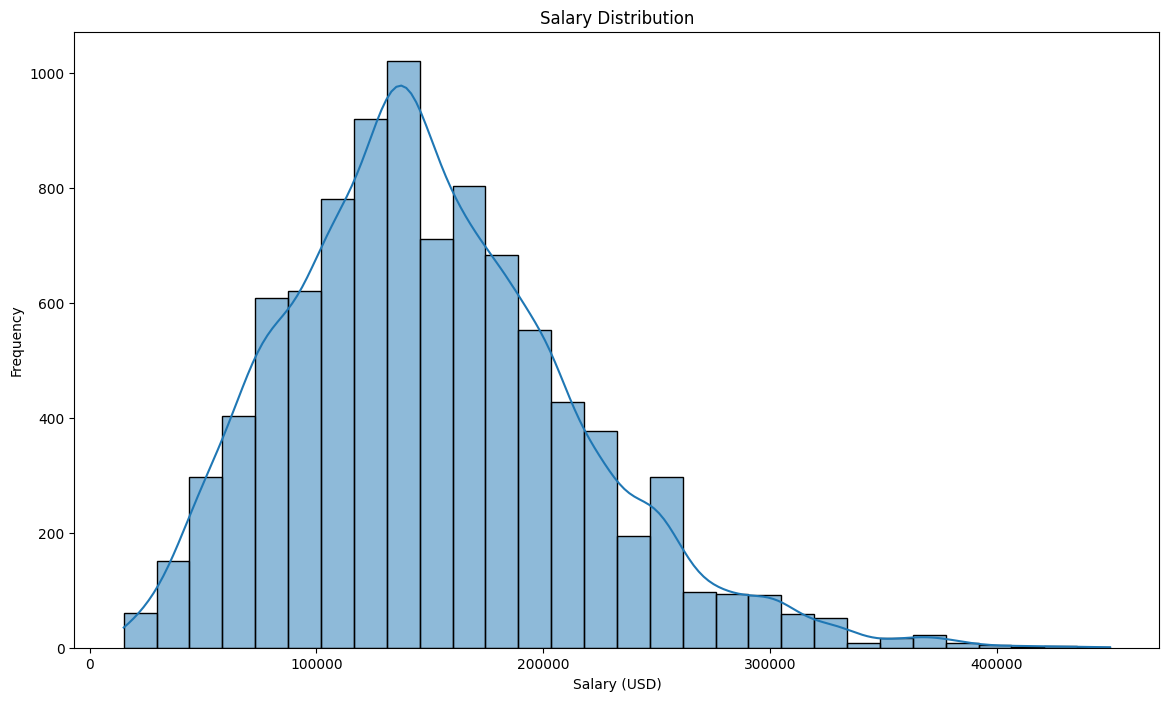

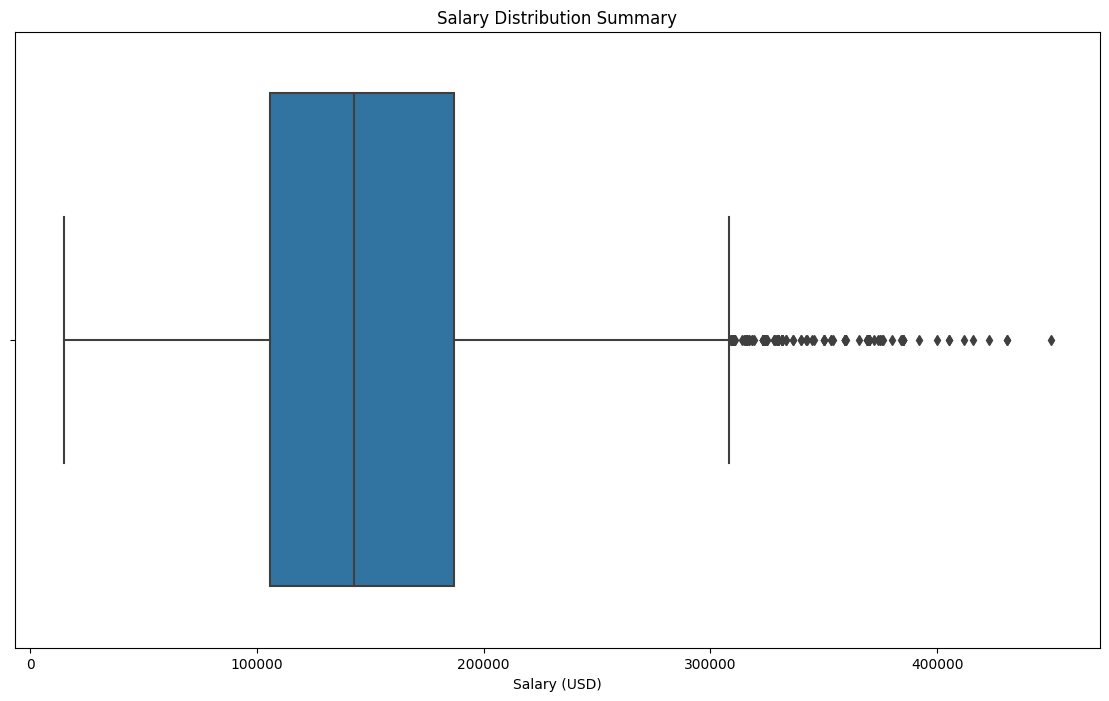

In [104]:
plt.figure(figsize=(14, 8))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Salary Distribution Summary')
plt.xlabel('Salary (USD)')
plt.show()

## Categorical Variable Counts

In [105]:
categorical_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']

for column in categorical_columns:
    print(f"\n{column} counts:")
    print(df[column].value_counts())


job_title counts:
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64

job_category counts:
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: job_category, dtype: int64

salary_currency counts:
USD    8591
GBP     347
EUR     340
CAD

## Top Salary Values

In [106]:
top_salaries = df.nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd']]
print("Top 10 Highest Salaries:")
print(top_salaries)

Top 10 Highest Salaries:
                               job_title  salary_in_usd
9157                  Research Scientist         450000
7683                        Data Analyst         430967
5702                  Analytics Engineer         430640
9348  Applied Machine Learning Scientist         423000
9287            Principal Data Scientist         416000
9351                      Data Scientist         412000
1696                  Research Scientist         405000
9103                 Data Analytics Lead         405000
4938       Analytics Engineering Manager         399880
4267           Machine Learning Engineer         392000
